In [1]:
import pandas as pd

In [8]:
from google.colab import auth

auth.authenticate_user()

In [9]:
!gsutil cp gs://depa-team2-final-proj-data/prepared_data/financial.csv prepared_data_financial.csv
!gsutil cp gs://depa-team2-final-proj-data/prepared_data/stats.csv prepared_data_stats.csv
!gsutil cp gs://depa-team2-final-proj-data/prepared_data/salary.csv prepared_data_salary.csv
!gsutil cp gs://depa-team2-final-proj-data/prepared_data/demographic.csv prepared_data_demographic.csv
!gsutil cp gs://depa-team2-final-proj-data/prepared_data/team.csv prepared_data_team.csv
!gsutil cp gs://depa-team2-final-proj-data/prepared_data/player.csv prepared_data_player.csv

Copying gs://depa-team2-final-proj-data/prepared_data/financial.csv...
/ [1 files][  9.7 KiB/  9.7 KiB]                                                
Operation completed over 1 objects/9.7 KiB.                                      
Copying gs://depa-team2-final-proj-data/prepared_data/stats.csv...
/ [1 files][  3.5 MiB/  3.5 MiB]                                                
Operation completed over 1 objects/3.5 MiB.                                      
Copying gs://depa-team2-final-proj-data/prepared_data/salary.csv...
/ [1 files][667.6 KiB/667.6 KiB]                                                
Operation completed over 1 objects/667.6 KiB.                                    
Copying gs://depa-team2-final-proj-data/prepared_data/demographic.csv...
/ [1 files][472.9 KiB/472.9 KiB]                                                
Operation completed over 1 objects/472.9 KiB.                                    
Copying gs://depa-team2-final-proj-data/prepared_data/team.csv...
/ [

In [10]:
# show all files
import os
os.listdir()

['.config',
 'prepared_data_stats.csv',
 'prepared_data_salary.csv',
 'prepared_data_player.csv',
 'prepared_data_demographic.csv',
 'drive',
 'prepared_data_team.csv',
 'prepared_data_financial.csv',
 'sample_data']

In [11]:
financials = pd.read_csv('prepared_data_financial.csv')
stats = pd.read_csv('prepared_data_stats.csv')
salary = pd.read_csv('prepared_data_salary.csv')
demographics = pd.read_csv('prepared_data_demographic.csv')
teams = pd.read_csv('prepared_data_team.csv')
players = pd.read_csv('prepared_data_player.csv')

In [12]:
financials

,SEASON,TEAM_REVENUE,TEAM_TICKET_REVENUE,TEAM_OPERATING_INCOME,FINANCIAL_ID,TEAM_ID
0,2011,109,26.3,-15,1,1610612737
1,2012,99,20.1,-19,31,1610612737
2,2013,119,23.6,-4,61,1610612737
3,2014,133,22.9,15,91,1610612737
4,2015,142,27.8,7,121,1610612737
...,...,...,...,...,...,...
295,2016,155,34.8,7,180,1610612764
296,2017,222,55.1,21,210,1610612764
297,2018,255,56.8,34,240,1610612764
298,2019,269,60.9,55,270,1610612764


In [13]:
stats.columns

Index(['STATS_ID', 'PLAYER_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'SEASON'],
      dtype='object')

In [14]:
# merge all data
df = pd.merge(players, demographics, on=['PLAYER_ID','TEAM_ID'], how='left')
df = pd.merge(df, teams, on=['TEAM_ID', 'TEAM_NAME'], how='left')
df = pd.merge(df, stats, on=['PLAYER_ID','TEAM_ID','TEAM_ABBREVIATION'], how='left')
df = pd.merge(df, salary, on=['PLAYER_ID'], how='left')
df = pd.merge(df, financials, on=['TEAM_ID','SEASON'], how='left')

In [15]:
df.columns

Index(['PLAYER_ID', 'FULL_NAME', 'FIRST_NAME', 'LAST_NAME', 'IS_ACTIVE',
       'TEAM_ID', 'BIRTHDATE', 'SCHOOL', 'COUNTRY', 'LAST_AFFILIATION',
       'HEIGHT', 'WEIGHT', 'SEASON_EXP', 'POSITION', 'ROSTERSTATUS',
       'GAMES_PLAYED_CURRENT_SEASON_FLAG', 'TEAM_NAME', 'TEAM_ABBREVIATION',
       'TEAM_CODE', 'TEAM_CITY', 'PLAYERCODE', 'FROM_YEAR', 'TO_YEAR',
       'DLEAGUE_FLAG', 'NBA_FLAG', 'GAMES_PLAYED_FLAG', 'DRAFT_YEAR',
       'DRAFT_ROUND', 'DRAFT_NUMBER', 'GREATEST_75_FLAG', 'DEMOGRAPHIC_ID',
       'ABR', 'NICKNAME', 'CITY', 'STATE', 'YEAR_FOUNDED', 'STATS_ID',
       'LEAGUE_ID', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SEASON', 'SALARY_ID',
       'Name', 'Season', 'Current_Season_Salary', 'Inflation_Adj_Salary',
       'TEAM_REVENUE', 'TEAM_TICKET_REVENUE', 'TEAM_OPERATING_INCOME',
       'FINANCIAL_ID'],
      dtype='object')

In [16]:
df.shape

(56093, 70)

# Data Quality Analysis

In [18]:
# 1. Checking for missing values
missing_values = df.isnull().sum()

# 2. Checking for duplicates
duplicate_rows = df.duplicated().sum()

# 3. Checking for unique values in key columns
unique_player_ids = df['PLAYER_ID'].nunique()
unique_teams = df['TEAM_ID'].nunique()
unique_seasons = df['SEASON'].nunique()

# 4. Basic descriptive statistics for numerical columns
descriptive_stats = df.describe()

missing_values, duplicate_rows


(PLAYER_ID                    0
 FULL_NAME                    0
 FIRST_NAME                  98
 LAST_NAME                    0
 IS_ACTIVE                    0
                          ...  
 Inflation_Adj_Salary      2485
 TEAM_REVENUE             46731
 TEAM_TICKET_REVENUE      46731
 TEAM_OPERATING_INCOME    46731
 FINANCIAL_ID             46731
 Length: 70, dtype: int64,
 0)

In [29]:
print(missing_values.to_string())

PLAYER_ID                               0
FULL_NAME                               0
FIRST_NAME                             98
LAST_NAME                               0
IS_ACTIVE                               0
TEAM_ID                              1998
BIRTHDATE                            1998
SCHOOL                               1998
COUNTRY                              1998
LAST_AFFILIATION                     1998
HEIGHT                               2460
WEIGHT                               2460
SEASON_EXP                           1998
POSITION                             2149
ROSTERSTATUS                         1998
GAMES_PLAYED_CURRENT_SEASON_FLAG     1998
TEAM_NAME                            5583
TEAM_ABBREVIATION                    5583
TEAM_CODE                            5583
TEAM_CITY                            5583
PLAYERCODE                           1998
FROM_YEAR                            1998
TO_YEAR                              1998
DLEAGUE_FLAG                      

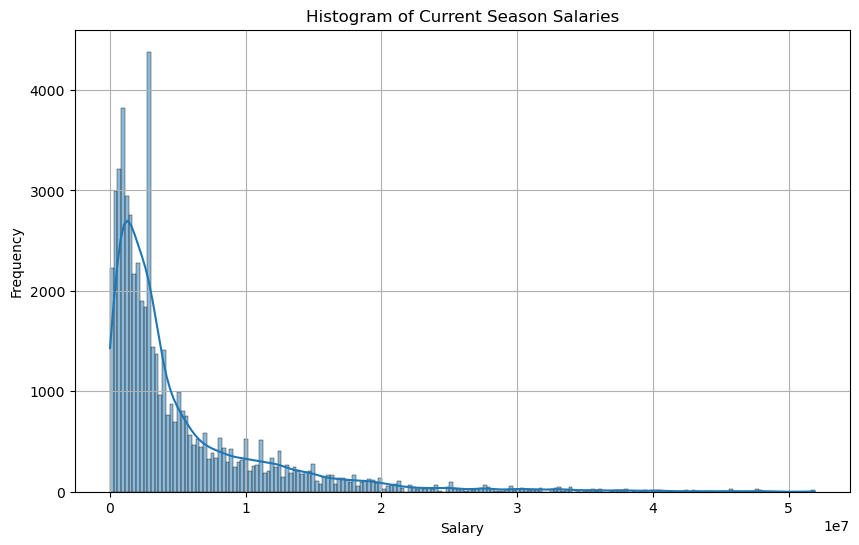

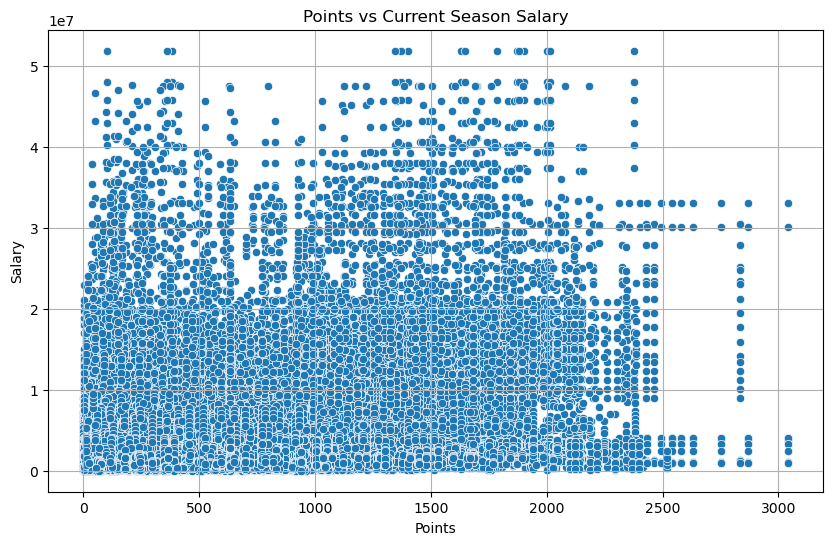

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning: Handling missing values for key columns (e.g., financial data)
# For simplicity, we'll fill missing numerical values with the median of their respective column.
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Check if the missing values are filled
missing_values_after_cleaning = df[numerical_columns].isnull().sum()

# Visualization
# 1. Histogram of Current Season Salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['Current_Season_Salary'], kde=True)
plt.title('Histogram of Current Season Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 2. Scatter plot of Points vs Current Season Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PTS', y='Current_Season_Salary', data=df)
plt.title('Points vs Current Season Salary')
plt.xlabel('Points')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

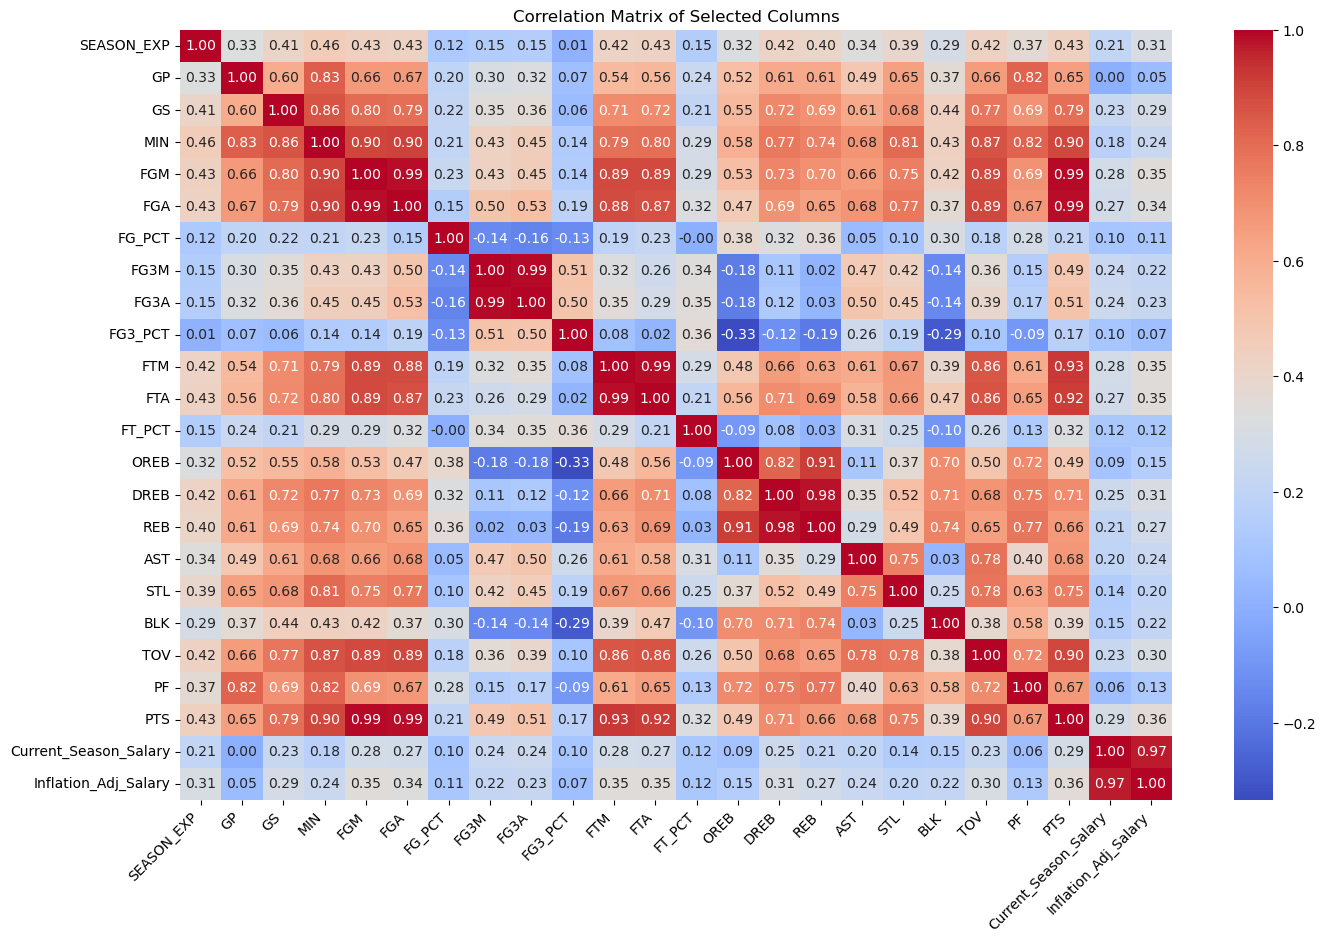

(POSITION
 Guard             17649
 Forward           16209
 Center             7911
 Forward-Center     3425
 Guard-Forward      3380
 Center-Forward     3343
 Forward-Guard      2027
 Name: count, dtype: int64,
 TEAM_NAME
 Lakers       2998
 Pacers       2431
 Heat         2258
 Mavericks    2233
 Pistons      2153
 Name: count, dtype: int64)

In [ ]:
# Correlation Analysis
# Selecting key numerical columns for correlation analysis
columns_for_correlation = [
    'SEASON_EXP', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
    'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
    'BLK', 'TOV', 'PF', 'PTS', 'Current_Season_Salary', 'Inflation_Adj_Salary'
]

# Computing correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

# Visualization of the correlation matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Columns')
plt.xticks(rotation=45, ha='right')
plt.show()

# Categorical Data Analysis
# For simplicity, we'll focus on two categorical variables: 'POSITION' and 'TEAM_NAME'
# Frequency distribution of players in different positions
position_distribution = df['POSITION'].value_counts()

# Frequency distribution of players in different teams
team_distribution = df['TEAM_NAME'].value_counts()

position_distribution, team_distribution.head()  # Displaying top 5 teams only for brevity


Current_Season_Salary shows moderate positive correlations with `PTS` (Points), `MIN` (Minutes Played), and `AST` (Assists), suggesting that players with higher performance metrics tend to have higher salaries.•There are weaker correlations between salary and shooting percentages (`FG_PCT`, `FT_PCT`, `FG3_PCT`).

# Regression Analysis

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
data = df.copy()

# Update the features list with the converted 'HEIGHT_INCHES' column
performance_and_physical_features_updated = [
    'WEIGHT', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT',
    'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
    'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SEASON_EXP'
]

# Preparing the X variables (features) with the updated list
X_performance_physical = data[performance_and_physical_features_updated]
y_salary = data['Inflation_Adj_Salary']
# Splitting and modeling for Salary Prediction
X_train_salary, X_test_salary, y_train_salary, y_test_salary = train_test_split(X_performance_physical, y_salary, test_size=0.2, random_state=42)
salary_model = LinearRegression()
salary_model.fit(X_train_salary, y_train_salary)
salary_predictions = salary_model.predict(X_test_salary)
salary_mse = mean_squared_error(y_test_salary, salary_predictions)
salary_r2 = r2_score(y_test_salary, salary_predictions)
y_ticket_revenue = data['TEAM_TICKET_REVENUE']
# Splitting and modeling for Ticket Revenue Prediction
X_train_ticket, X_test_ticket, y_train_ticket, y_test_ticket = train_test_split(X_performance_physical, y_ticket_revenue, test_size=0.2, random_state=42)
ticket_revenue_model = LinearRegression()
ticket_revenue_model.fit(X_train_ticket, y_train_ticket)
ticket_revenue_predictions = ticket_revenue_model.predict(X_test_ticket)
ticket_revenue_mse = mean_squared_error(y_test_ticket, ticket_revenue_predictions)
ticket_revenue_r2 = r2_score(y_test_ticket, ticket_revenue_predictions)

salary_mse, salary_r2, ticket_revenue_mse, ticket_revenue_r2


(48768634251901.64, 0.271883208156079, 80.64547027313316, 0.024795356227233945)

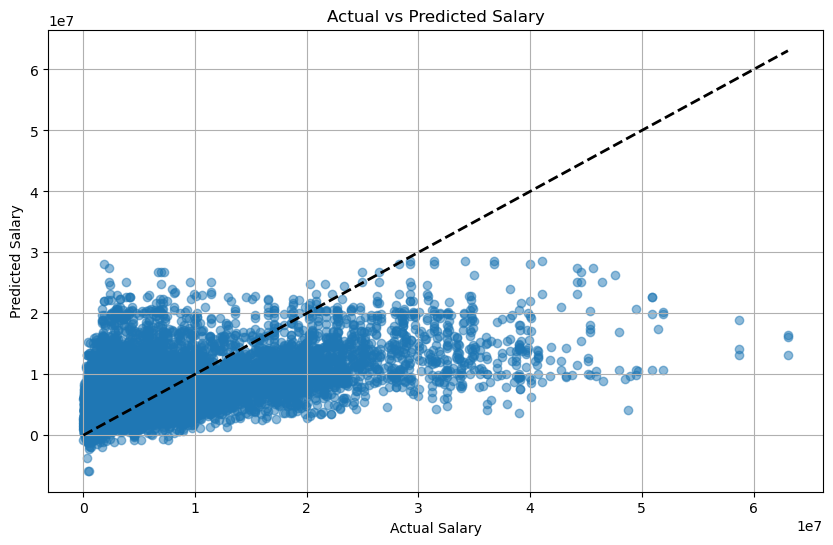

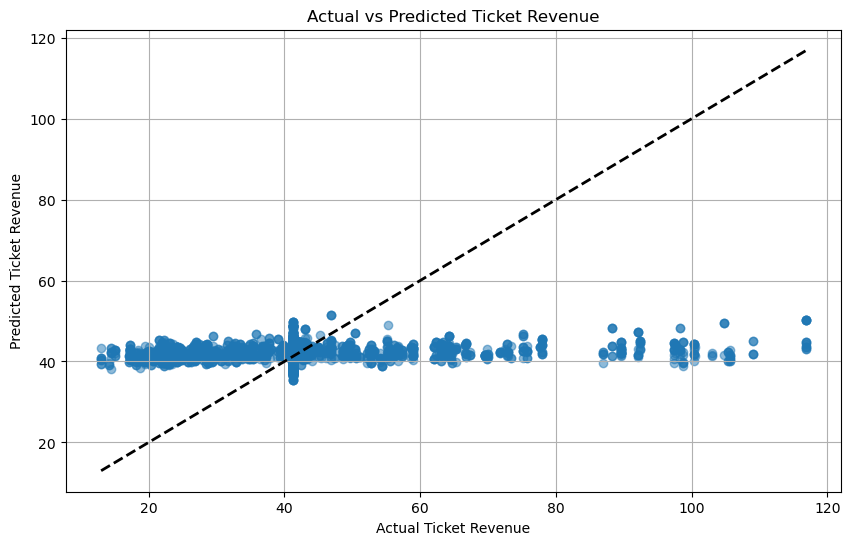

In [ ]:
# Visualization of the results from the linear regression models

# Function to create scatter plots for actual vs predicted values
def plot_actual_vs_predicted(y_actual, y_predicted, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted, alpha=0.5)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2)  # Diagonal line
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Visualizing Actual vs Predicted values for Salary Prediction
plot_actual_vs_predicted(y_test_salary, salary_predictions, 'Actual vs Predicted Salary', 'Actual Salary', 'Predicted Salary')

# Visualizing Actual vs Predicted values for Ticket Revenue Prediction
plot_actual_vs_predicted(y_test_ticket, ticket_revenue_predictions, 'Actual vs Predicted Ticket Revenue', 'Actual Ticket Revenue', 'Predicted Ticket Revenue')


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

# Defining the models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

# Dictionary to store the cross-validation scores
cv_scores = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Applying cross-validation on the salary prediction task
    scores = cross_val_score(model, X_performance_physical, y_salary, cv=5, scoring='r2')
    cv_scores[model_name] = np.mean(scores)

cv_scores



/Users/yilin_gong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.004e+17, tolerance: 1.813e+14
  model = cd_fast.enet_coordinate_descent(
/Users/yilin_gong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.375e+17, tolerance: 1.914e+14
  model = cd_fast.enet_coordinate_descent(
/Users/yilin_gong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

{'Random Forest': 0.23102686160960192,
 'Gradient Boosting': 0.24692499659255357,
 'Support Vector Regression': -0.14201036832171354,
 'Ridge Regression': 0.21386222890703327,
 'Lasso Regression': 0.21406322152894894}

In [ ]:
# Dictionary to store the cross-validation scores
cv_scores = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Applying cross-validation on the salary prediction task
    scores = cross_val_score(model, X_performance_physical, y_ticket_revenue, cv=5, scoring='r2')
    cv_scores[model_name] = np.mean(scores)

cv_scores

/Users/yilin_gong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.574e+04, tolerance: 3.611e+02
  model = cd_fast.enet_coordinate_descent(
/Users/yilin_gong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.287e+05, tolerance: 3.914e+02
  model = cd_fast.enet_coordinate_descent(
/Users/yilin_gong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

{'Random Forest': -0.23531648727920218,
 'Gradient Boosting': -0.06540862755681014,
 'Support Vector Regression': -0.0032655686861180256,
 'Ridge Regression': -0.01648909534397145,
 'Lasso Regression': -0.010157270286152653}

# Market Analysis

In [ ]:
# For Player Career Trajectory Analysis, we need to focus on individual players over their career span
# The goal is to analyze how their performance metrics and salary change over time

# Selecting relevant columns for the analysis
career_trajectory_columns = [
    'PLAYER_ID', 'FULL_NAME', 'SEASON_EXP', 'GP', 'MIN', 'PTS',
    'REB', 'AST', 'STL', 'BLK', 'Current_Season_Salary', 'Season'
]

# Filtering the dataframe
career_df = df[career_trajectory_columns]

# Grouping the data by player and season to get the average performance metrics and salary for each season
career_trajectory_df = career_df.groupby(['PLAYER_ID', 'FULL_NAME', 'Season']).mean().reset_index()

# Sorting the data by player and season for sequential analysis
career_trajectory_df.sort_values(by=['PLAYER_ID', 'Season'], inplace=True)

# Displaying the first few rows of the prepared dataframe
career_trajectory_df.head()


,PLAYER_ID,FULL_NAME,Season,SEASON_EXP,GP,MIN,PTS,REB,AST,STL,BLK,Current_Season_Salary
0,2,Byron Scott,1990.0,14.0,76.909091,2321.181818,1161.818182,230.363636,215.0,94.363636,21.090909,1100000.0
1,2,Byron Scott,1991.0,14.0,76.909091,2321.181818,1161.818182,230.363636,215.0,94.363636,21.090909,1100000.0
2,2,Byron Scott,1992.0,14.0,76.909091,2321.181818,1161.818182,230.363636,215.0,94.363636,21.090909,1100000.0
3,2,Byron Scott,1993.0,14.0,76.909091,2321.181818,1161.818182,230.363636,215.0,94.363636,21.090909,650000.0
4,2,Byron Scott,1994.0,14.0,76.909091,2321.181818,1161.818182,230.363636,215.0,94.363636,21.090909,1550000.0


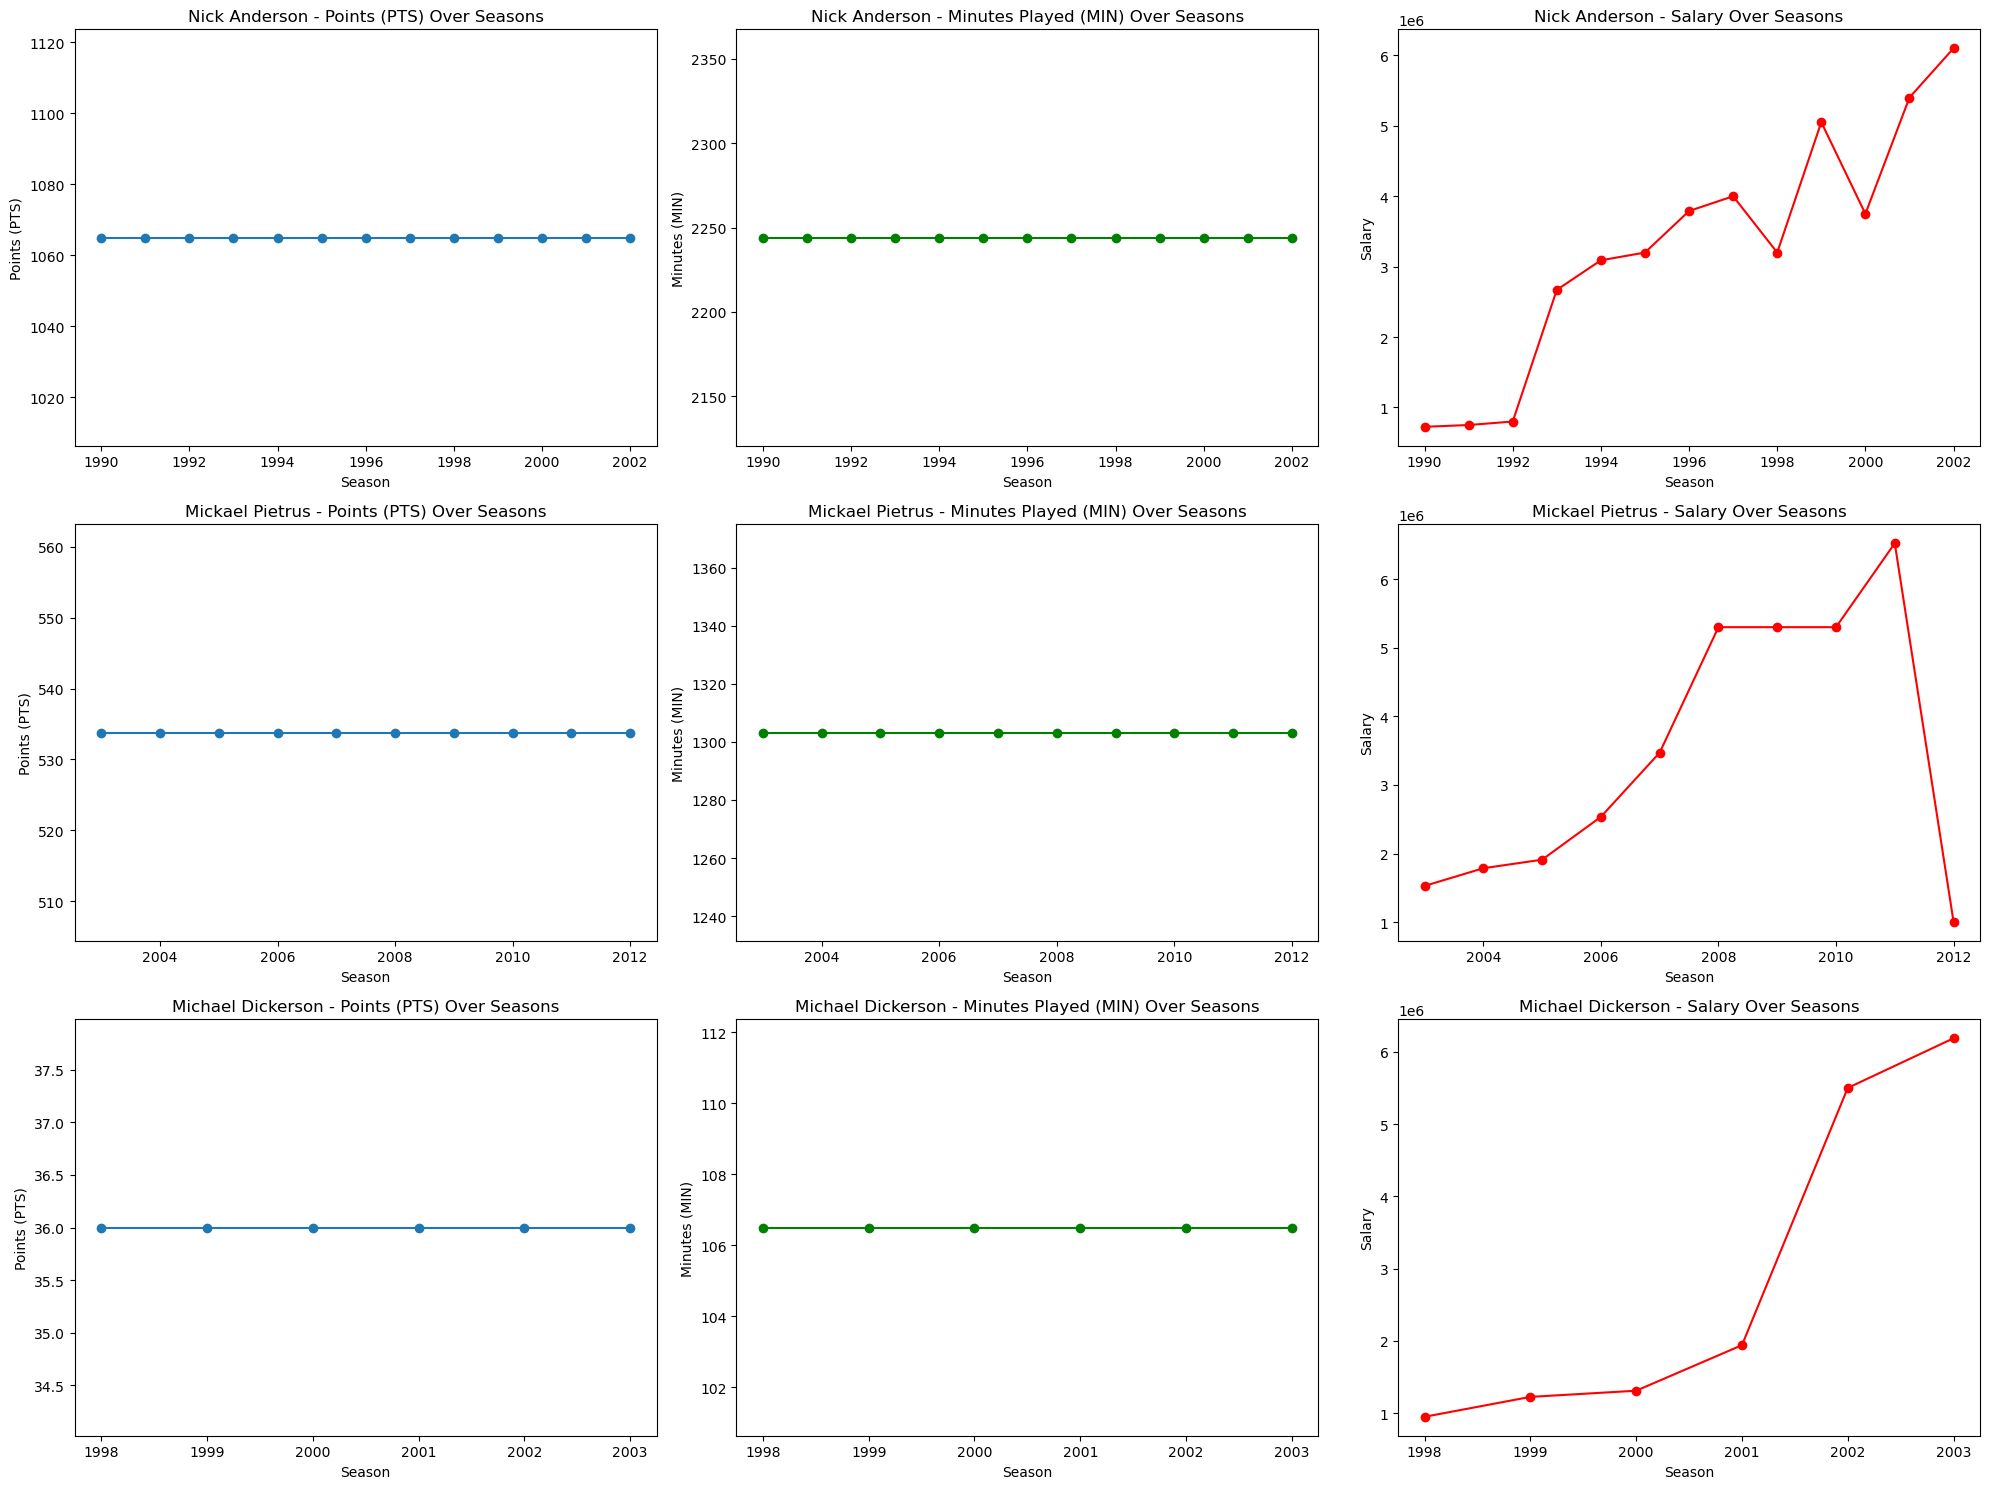

In [ ]:
# Selecting a few random players for the demonstration
random_players = np.random.choice(career_trajectory_df['FULL_NAME'].unique(), 3)

# Filtering the data for these players
selected_player_data = career_trajectory_df[career_trajectory_df['FULL_NAME'].isin(random_players)]

# Plotting the career trajectory for these players
plt.figure(figsize=(20, 15))

for i, player in enumerate(random_players, 1):
    player_data = selected_player_data[selected_player_data['FULL_NAME'] == player]

    # Subplot for Points (PTS) over Seasons
    plt.subplot(3, 3, 3 * i - 2)
    plt.plot(player_data['Season'], player_data['PTS'], marker='o')
    plt.title(f'{player} - Points (PTS) Over Seasons')
    plt.xlabel('Season')
    plt.ylabel('Points (PTS)')

    # Subplot for Minutes (MIN) over Seasons
    plt.subplot(3, 3, 3 * i - 1)
    plt.plot(player_data['Season'], player_data['MIN'], marker='o', color='green')
    plt.title(f'{player} - Minutes Played (MIN) Over Seasons')
    plt.xlabel('Season')
    plt.ylabel('Minutes (MIN)')

    # Subplot for Salary over Seasons
    plt.subplot(3, 3, 3 * i)
    plt.plot(player_data['Season'], player_data['Current_Season_Salary'], marker='o', color='red')
    plt.title(f'{player} - Salary Over Seasons')
    plt.xlabel('Season')
    plt.ylabel('Salary')

plt.tight_layout()
plt.show()


# market analysis

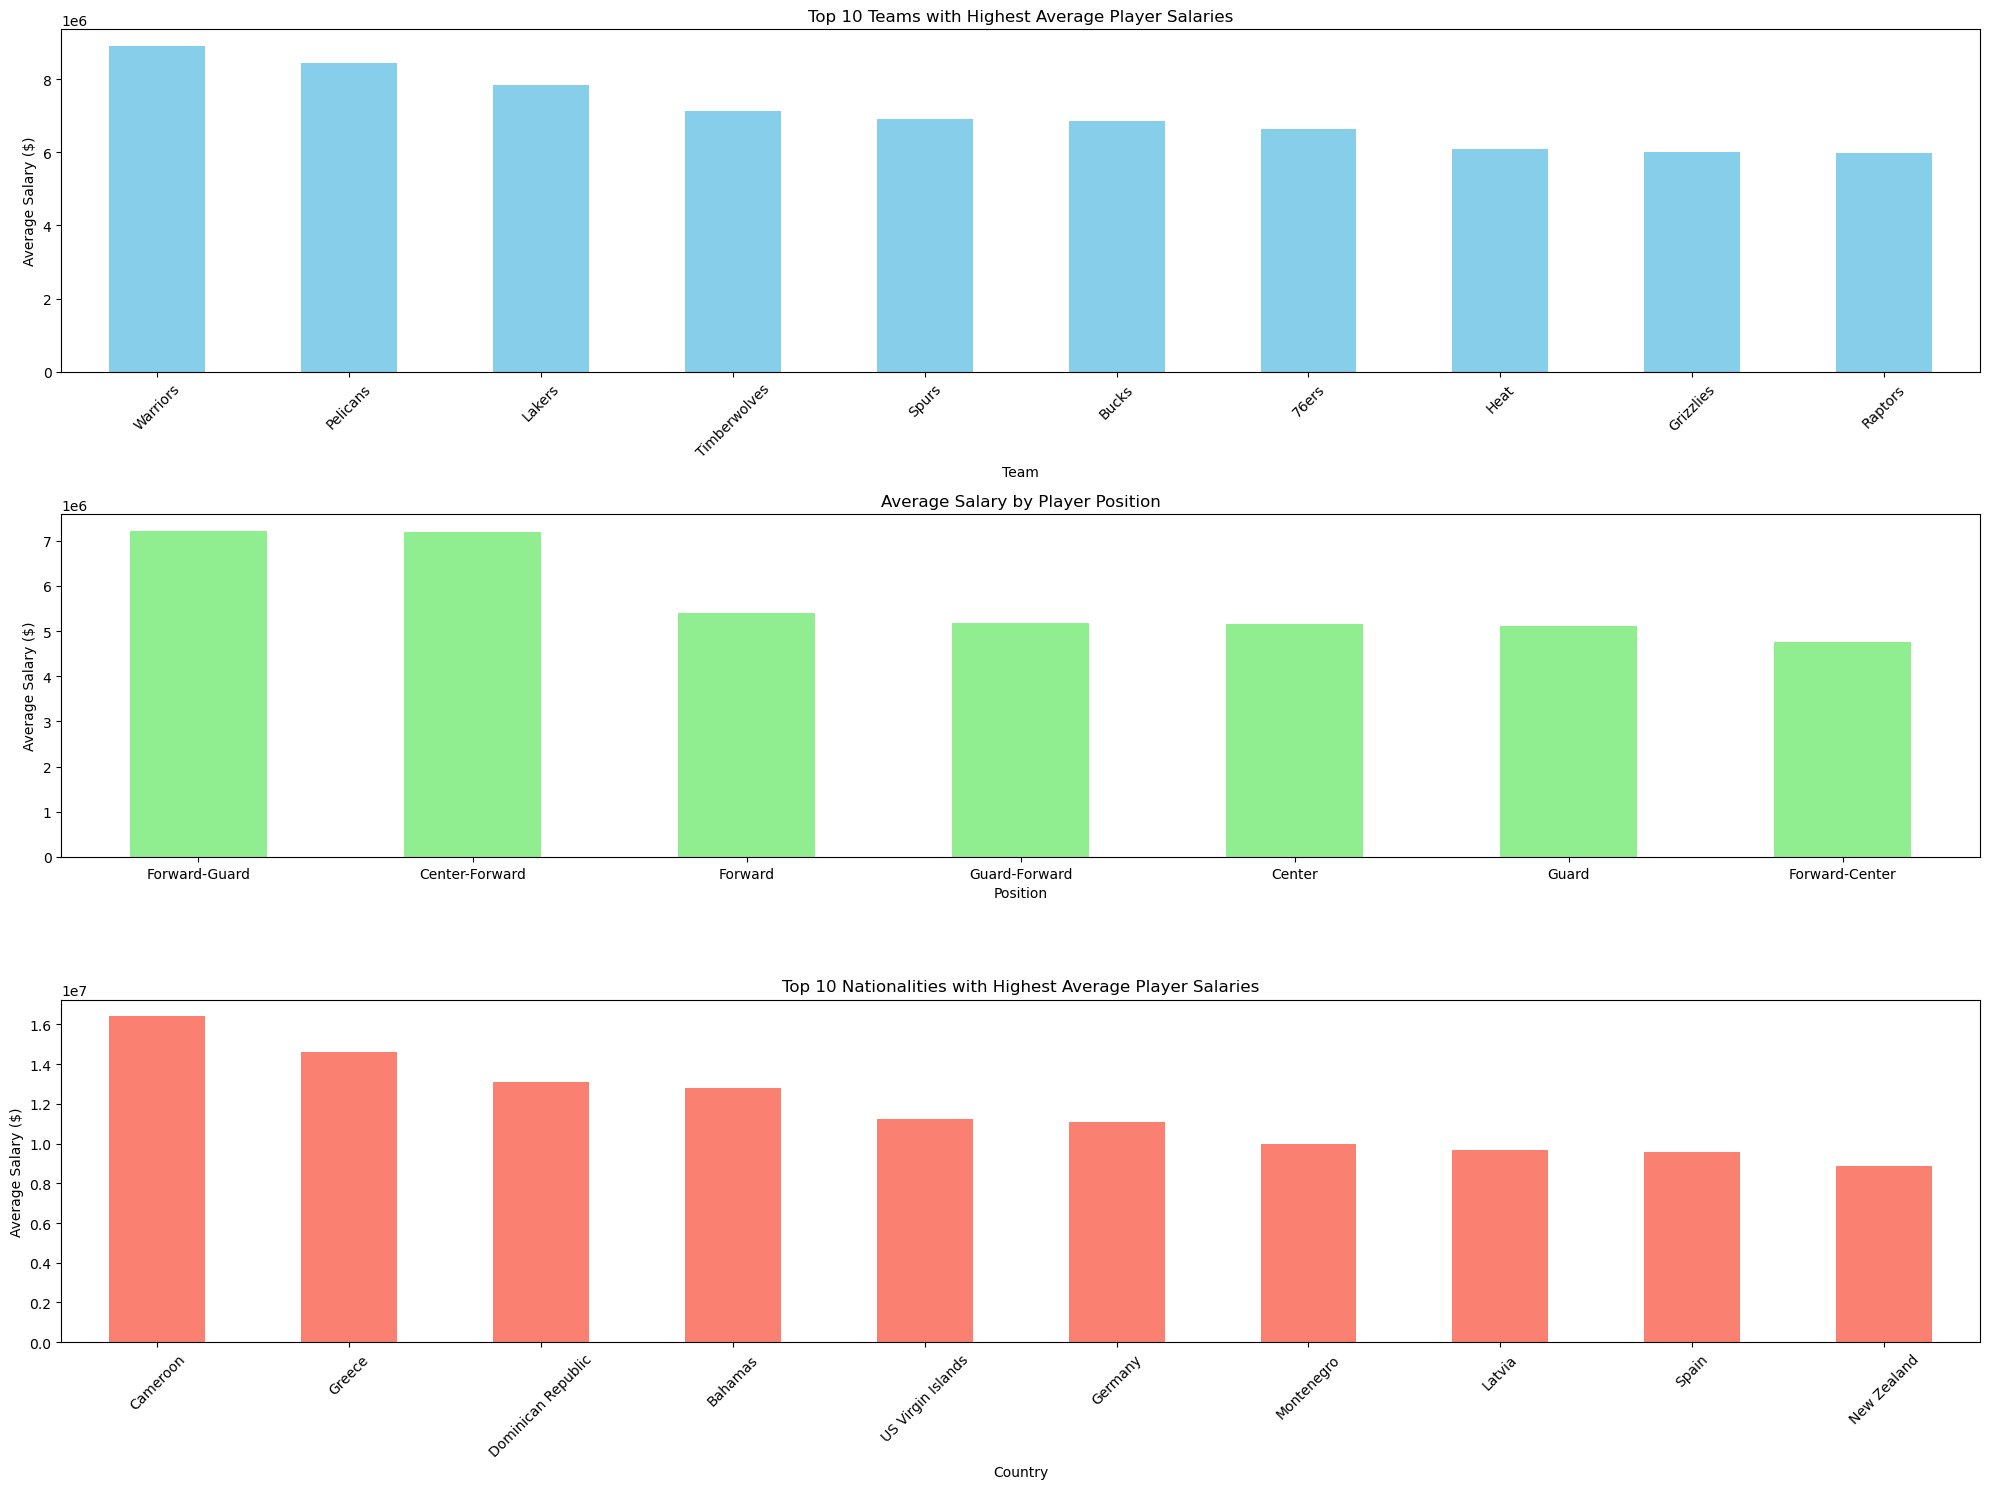

In [ ]:
# Market Analysis involves comparing salary distributions among teams, positions, or player nationalities

# Selecting relevant columns for Market Analysis
market_analysis_columns = [
    'TEAM_NAME', 'POSITION', 'COUNTRY', 'Current_Season_Salary'
]

# Filtering the dataframe
market_df = df[market_analysis_columns]

# We will analyze the following:
# 1. Average salary by team
# 2. Average salary by position
# 3. Average salary by player nationality

# 1. Average salary by team
avg_salary_by_team = market_df.groupby('TEAM_NAME')['Current_Season_Salary'].mean().sort_values(ascending=False)

# 2. Average salary by position
avg_salary_by_position = market_df.groupby('POSITION')['Current_Season_Salary'].mean().sort_values(ascending=False)

# 3. Average salary by player nationality
avg_salary_by_country = market_df.groupby('COUNTRY')['Current_Season_Salary'].mean().sort_values(ascending=False)

# Visualizing the Market Analysis results

# Setting up the plot area
plt.figure(figsize=(20, 15))

# Plot 1: Average Salary by Team
plt.subplot(3, 1, 1)
avg_salary_by_team.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Teams with Highest Average Player Salaries')
plt.xlabel('Team')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)

# Plot 2: Average Salary by Position
plt.subplot(3, 1, 2)
avg_salary_by_position.plot(kind='bar', color='lightgreen')
plt.title('Average Salary by Player Position')
plt.xlabel('Position')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=0)

# Plot 3: Average Salary by Player Nationality
plt.subplot(3, 1, 3)
avg_salary_by_country.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Nationalities with Highest Average Player Salaries')
plt.xlabel('Country')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



# Time Series Analysis

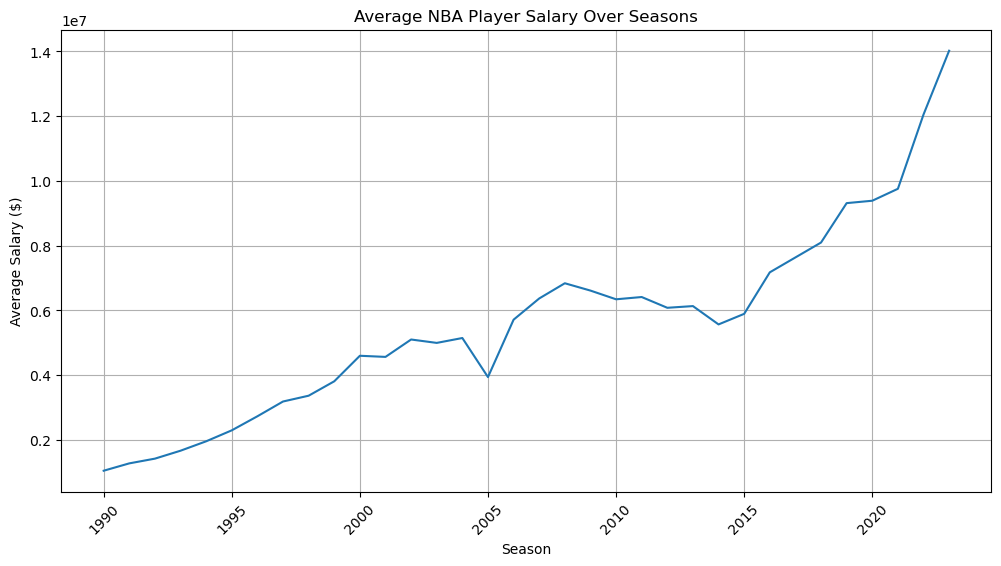

In [ ]:
# Dropping rows with NaN in 'Season' and 'Current_Season_Salary', and converting 'Season' to int for simplicity
df_cleaned = df.dropna(subset=['Season', 'Current_Season_Salary'])
df_cleaned['Season'] = df_cleaned['Season'].astype(int)

# Aggregating the data to find the average salary per season
average_salary_per_season = df_cleaned.groupby('Season')['Current_Season_Salary'].mean().reset_index()

# Visualizing the trend of average salary over the seasons
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_salary_per_season, x='Season', y='Current_Season_Salary')
plt.title('Average NBA Player Salary Over Seasons')
plt.xlabel('Season')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Function to perform Augmented Dickey-Fuller test
def perform_adfuller_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Values {key}: {value}')
    print('---' * 10)

# Performing the Augmented Dickey-Fuller test for stationarity
print("Augmented Dickey-Fuller Test Results:")
perform_adfuller_test(average_salary_per_season['Current_Season_Salary'])

# Function to perform KPSS test
def perform_kpss_test(series):
    statistic, p_value, n_lags, critical_values = kpss(series, regression='c')
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    for key, value in critical_values.items():
        print(f'Critical Values {key}: {value}')
    print('---' * 10)

# Performing the KPSS test for stationarity
print("KPSS Test Results:")
perform_kpss_test(average_salary_per_season['Current_Season_Salary'])


Augmented Dickey-Fuller Test Results:
ADF Statistic: 1.8273376924312794
p-value: 0.9984017233841845
Critical Values 1%: -3.653519805908203
Critical Values 5%: -2.9572185644531253
Critical Values 10%: -2.6175881640625
------------------------------
KPSS Test Results:
KPSS Statistic: 0.8694187215263461
p-value: 0.01
Critical Values 10%: 0.347
Critical Values 5%: 0.463
Critical Values 2.5%: 0.574
Critical Values 1%: 0.739
------------------------------


/var/folders/pp/kd_cw06d1_g8pcrv3zsc9s500000gn/T/ipykernel_17564/2614232717.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, regression='c')


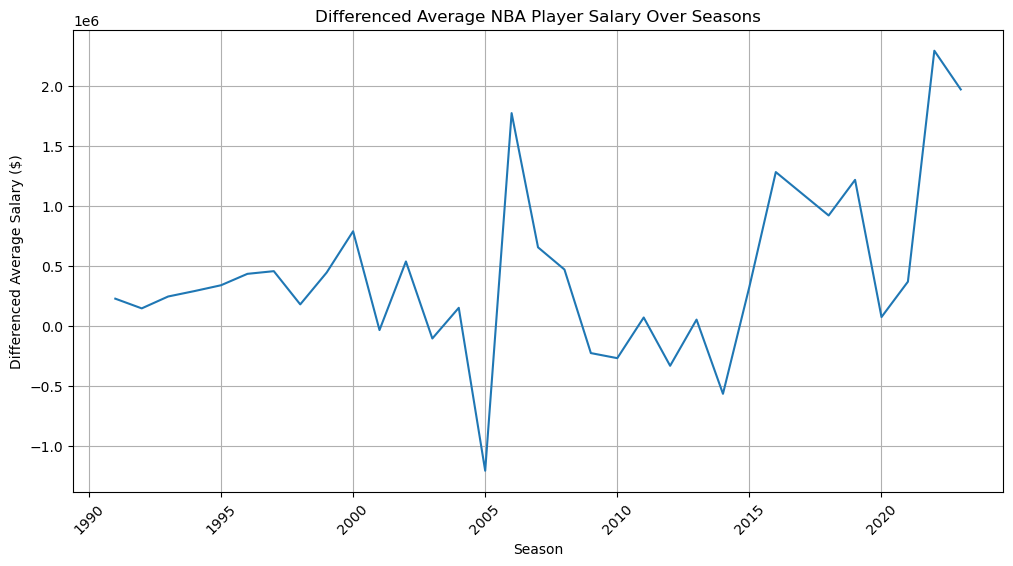

Augmented Dickey-Fuller Test on Differenced Data:
ADF Statistic: -3.756399097355286
p-value: 0.003386272441817684
Critical Values 1%: -3.661428725118324
Critical Values 5%: -2.960525341210433
Critical Values 10%: -2.6193188033298647
------------------------------


In [ ]:
# Differencing the data to make it stationary
average_salary_per_season['Salary_Diff'] = average_salary_per_season['Current_Season_Salary'].diff()

# Dropping the first NaN value after differencing
average_salary_diff = average_salary_per_season.dropna(subset=['Salary_Diff'])

# Visualizing the differenced data
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_salary_diff, x='Season', y='Salary_Diff')
plt.title('Differenced Average NBA Player Salary Over Seasons')
plt.xlabel('Season')
plt.ylabel('Differenced Average Salary ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Re-performing the Augmented Dickey-Fuller test on the differenced data
print("Augmented Dickey-Fuller Test on Differenced Data:")
perform_adfuller_test(average_salary_diff['Salary_Diff'])


/var/folders/pp/kd_cw06d1_g8pcrv3zsc9s500000gn/T/ipykernel_17564/3076750827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_salary_diff['Salary_Diff2'] = average_salary_diff['Salary_Diff'].diff()


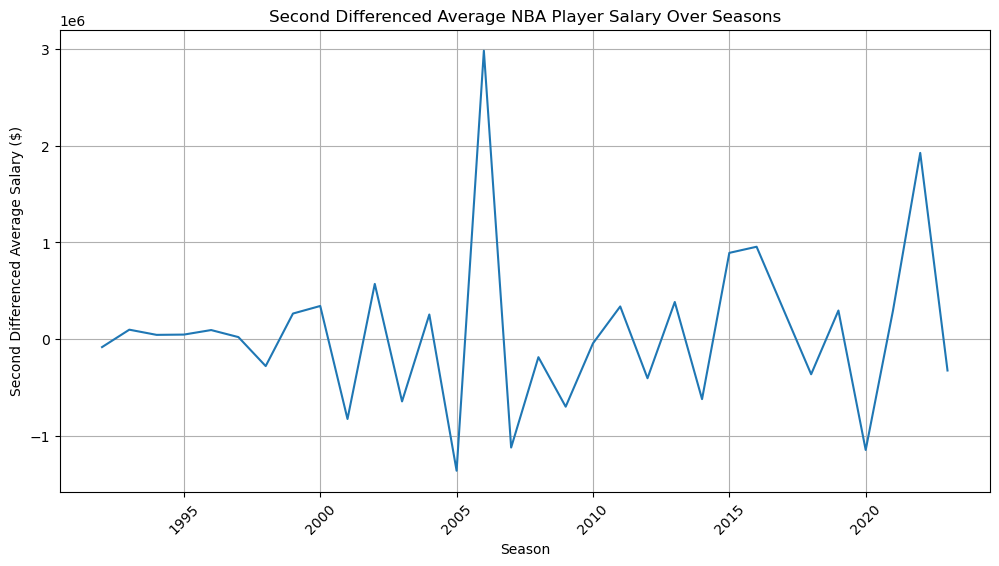

Augmented Dickey-Fuller Test on Second Differenced Data:
ADF Statistic: -8.706565136155815
p-value: 3.686617110831636e-14
Critical Values 1%: -3.6699197407407405
Critical Values 5%: -2.9640707407407407
Critical Values 10%: -2.621171111111111
------------------------------


In [ ]:
# Applying a second round of differencing
average_salary_diff['Salary_Diff2'] = average_salary_diff['Salary_Diff'].diff()

# Dropping NaN values after the second differencing
average_salary_diff2 = average_salary_diff.dropna(subset=['Salary_Diff2'])

# Visualizing the second differenced data
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_salary_diff2, x='Season', y='Salary_Diff2')
plt.title('Second Differenced Average NBA Player Salary Over Seasons')
plt.xlabel('Season')
plt.ylabel('Second Differenced Average Salary ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Re-performing the Augmented Dickey-Fuller test on the second differenced data
print("Augmented Dickey-Fuller Test on Second Differenced Data:")
perform_adfuller_test(average_salary_diff2['Salary_Diff2'])


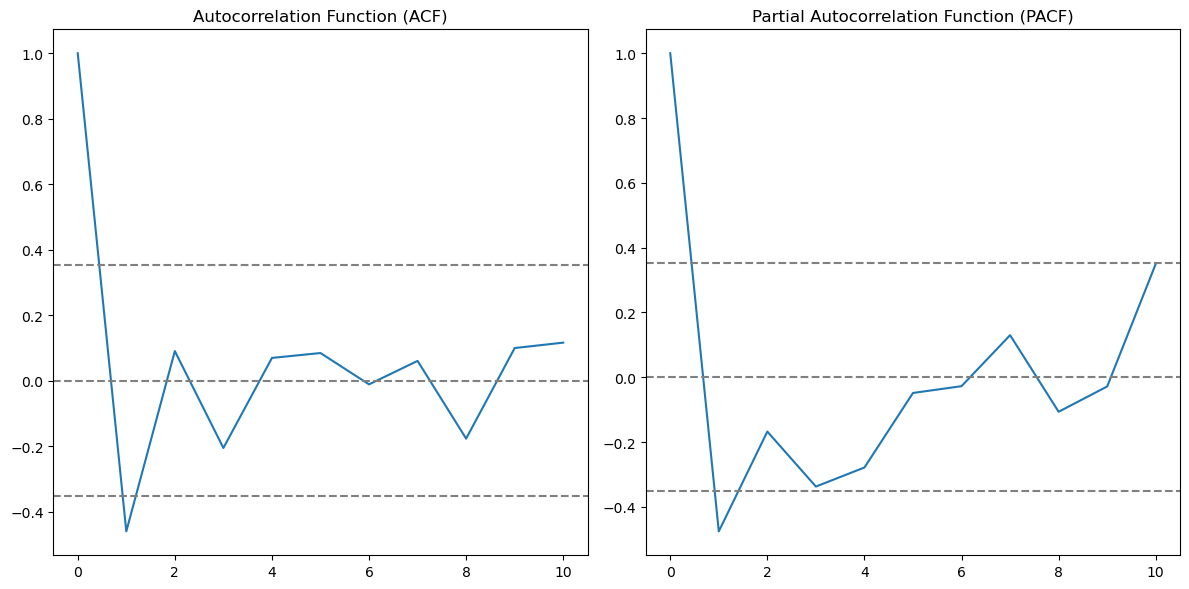

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

# Identifying the ARIMA parameters (p, d, q)
# Using the ACF and PACF plots to estimate p and q

# First, we need to decide the order of differencing (d); we already know that second differencing makes the series stationary
d = 2

# Plotting the ACF and PACF for the second differenced data
lags = 10  # Number of lags for ACF and PACF

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(acf(average_salary_diff2['Salary_Diff2'], nlags=lags))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(average_salary_diff2['Salary_Diff2'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(average_salary_diff2['Salary_Diff2'])), linestyle='--', color='gray')
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plt.plot(pacf(average_salary_diff2['Salary_Diff2'], nlags=lags))
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(average_salary_diff2['Salary_Diff2'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(average_salary_diff2['Salary_Diff2'])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
# Fitting the ARIMA model with the identified parameters
p = 1  # AR term
q = 1  # MA term

# Fitting the model
model = ARIMA(average_salary_diff2['Current_Season_Salary'], order=(p, d, q))
fitted_model = model.fit()

# Displaying the model summary
fitted_model.summary()

/Users/yilin_gong/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yilin_gong/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yilin_gong/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     Current_Season_Salary   No. Observations:                   31
Model:                    ARIMA(1, 2, 1)   Log Likelihood                -433.086
Date:                   Sun, 03 Dec 2023   AIC                            872.172
Time:                           13:00:15   BIC                            876.274
Sample:                                0   HQIC                           873.457
                                    - 31                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0866      0.464      0.187      0.852      -0.822       0.995
ma.L1         -0.7575      0.362     -2.091      0.037      -1.468      -0.047
sigma2      6.606e+11   6.76e-13   9.77e+23      0.000    6.61e+11    6.61e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.62
Prob(Q):                              0.89   Prob(JB):                         0.10
Heteroskedasticity (H):               8.24   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.34e+40. Standard errors may be unstable.
"""

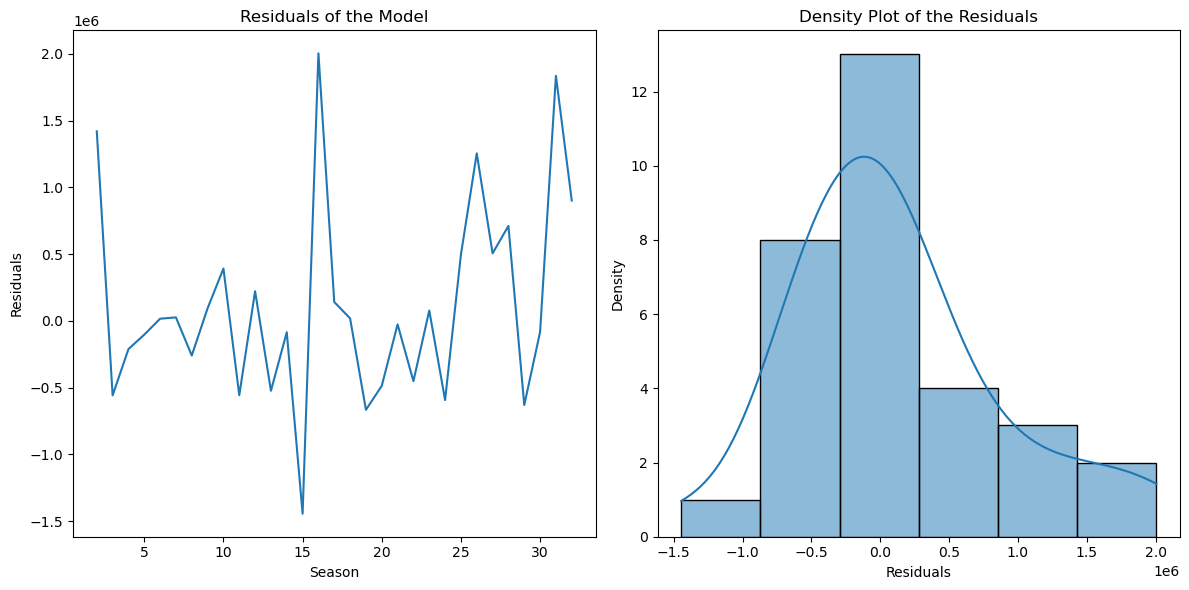

Normality Test: Statistics=4.990185089535622, p-value=0.08248881713006663


In [ ]:
# Conducting residual analysis of the fitted ARIMA model

# Extracting the residuals
residuals = fitted_model.resid

# Plotting the residuals
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals of the Model')
plt.xlabel('Season')
plt.ylabel('Residuals')

plt.subplot(122)
sns.histplot(residuals, kde=True)
plt.title('Density Plot of the Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Conducting a statistical test on the residuals
from scipy.stats import normaltest

# Test for normality
stat, p = normaltest(residuals)
print(f"Normality Test: Statistics={stat}, p-value={p}")


In [ ]:
import itertools

# Define the p, d, q parameters to take values between 0 and 3
p = d = q = range(0, 4)

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, [d], q))

# Grid search over combinations of parameters
best_aic = float("inf")
best_pdq = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(average_salary_diff2['Current_Season_Salary'], order=param)
        results = temp_model.fit()

        # Check if the current model's AIC is lower than the best one found so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

print(f"Best ARIMA Model: {best_pdq} with AIC: {best_aic}")


Best ARIMA Model: None with AIC: inf


# Team Analysis

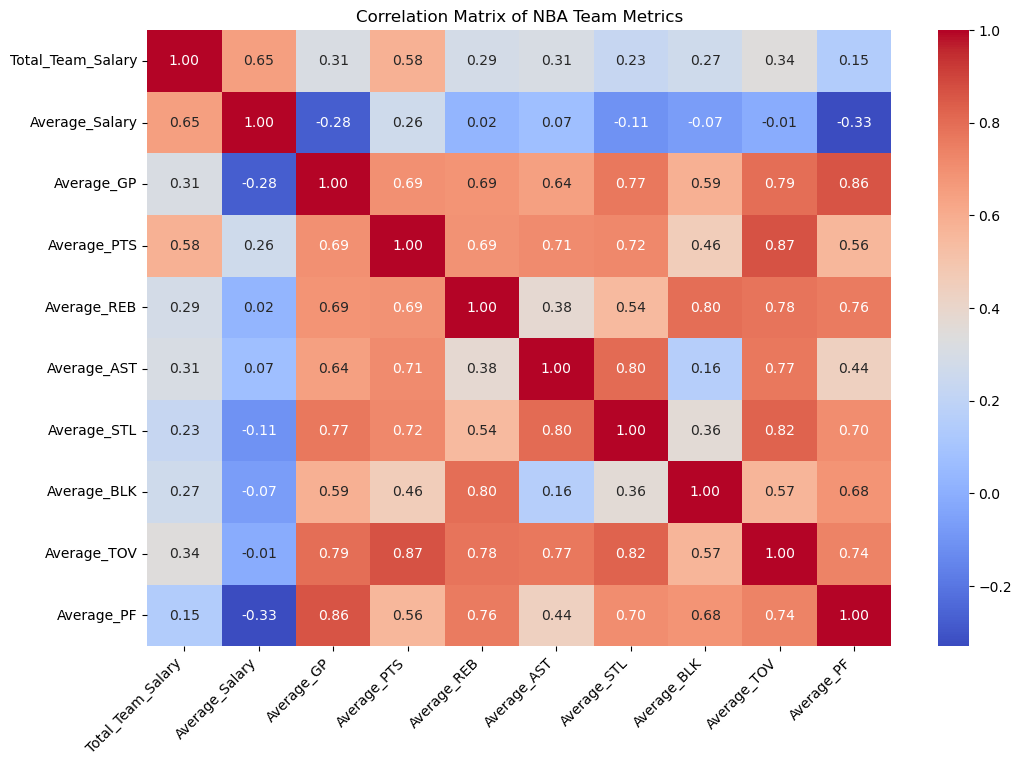

In [ ]:
team_aggregated_data = df.groupby('TEAM_NAME').agg({
    'Current_Season_Salary': ['sum', 'mean'],
    'GP': 'mean',
    'PTS': 'mean',
    'REB': 'mean',
    'AST': 'mean',
    'STL': 'mean',
    'BLK': 'mean',
    'TOV': 'mean',
    'PF': 'mean'
}).reset_index()

# Renaming columns for clarity
team_aggregated_data.columns = [
    'TEAM_NAME',
    'Total_Team_Salary',
    'Average_Salary',
    'Average_GP',
    'Average_PTS',
    'Average_REB',
    'Average_AST',
    'Average_STL',
    'Average_BLK',
    'Average_TOV',
    'Average_PF'
]

numeric_columns = ['Total_Team_Salary', 'Average_Salary', 'Average_GP', 'Average_PTS', 'Average_REB', 'Average_AST', 'Average_STL', 'Average_BLK', 'Average_TOV', 'Average_PF']
team_correlation_matrix = team_aggregated_data[numeric_columns].corr()

# Plotting the heatmap for the team correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(team_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of NBA Team Metrics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()